In [212]:
import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import pandas as pd
import numpy as np
import tensorflow as tf


print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [213]:
df = pd.read_csv('../data/housing.csv')
df

,Unnamed: 0,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...,...
20635,20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


Features:
MedInc median income in block group
HouseAge median house age in block group
AveRooms average number of rooms per household
AveBedrms average number of bedrooms per household
Population block group population
AveOccup average number of household members
Latitude block group latitude
Longitude block group longitude

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per census block group.
A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data
(a block group typically has a population of 600 to 3,000 people).

In [214]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [215]:
# df['Longitude'] = df['Longitude'].apply(lambda x: x *(-1))
df.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


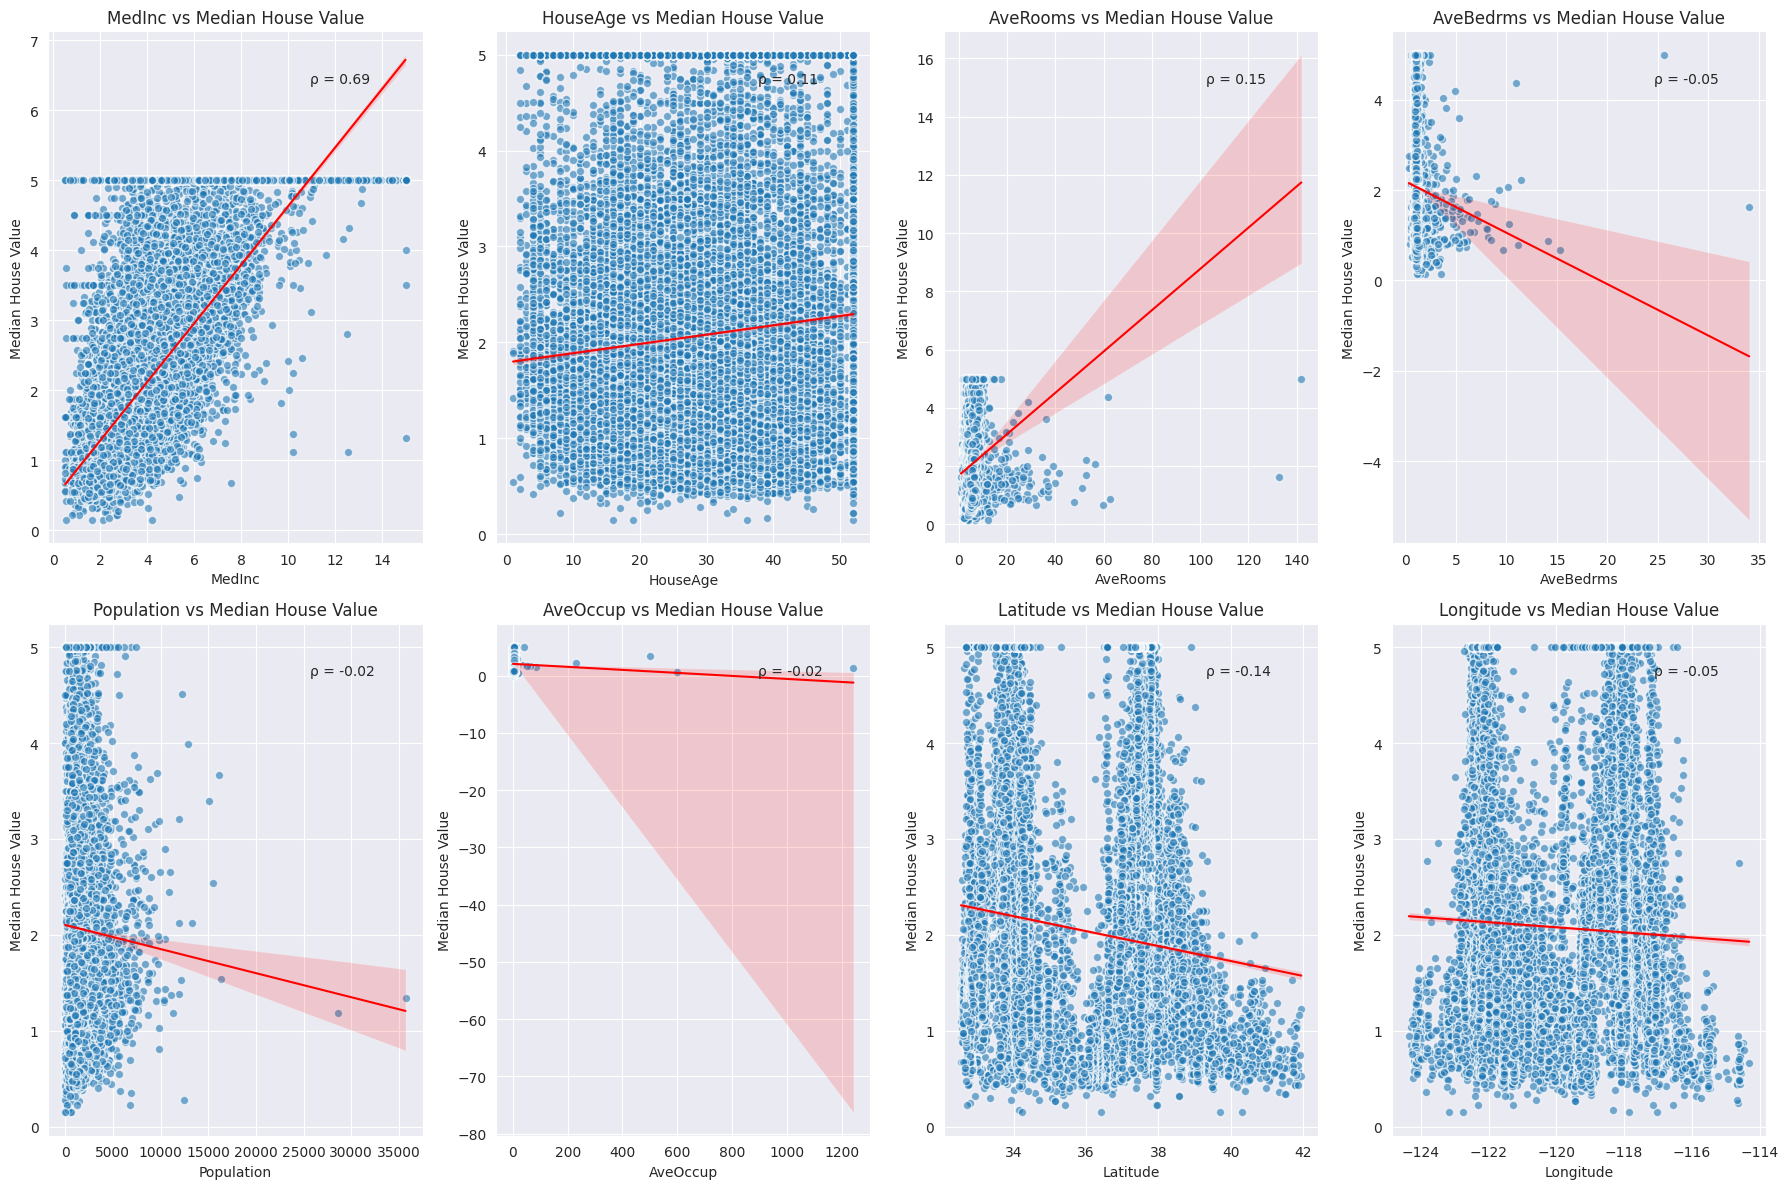

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 12))
axes = axes.flatten()

features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

for i, col in enumerate(features):
    axes[i].scatter(df[col], df['MedHouseVal'], alpha=0.6, edgecolor='w')

    sns.regplot(x=df[col], y=df['MedHouseVal'],
                scatter=False, ax=axes[i],
                line_kws={'color':'red', 'lw':1.5})

    corr = np.corrcoef(df[col], df['MedHouseVal'])[0,1]
    axes[i].annotate(f'ρ = {corr:.2f}', xy=(0.7, 0.9),
                     xycoords='axes fraction', fontsize=10)

    axes[i].set_title(f'{col} vs Median House Value', fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Median House Value')

plt.tight_layout()
plt.show()



$$
\text{Linear Regression}
$$

In [217]:
test_row = df.iloc[-1]
test_row

MedInc            2.388600
HouseAge         16.000000
AveRooms          5.254717
AveBedrms         1.162264
Population     1387.000000
AveOccup          2.616981
Latitude         39.370000
Longitude      -121.240000
MedHouseVal       0.894000
Name: 20639, dtype: float64

In [235]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

df = df.iloc[:-1]
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [236]:
X_train.shape

(14445, 8)

In [237]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Regression metrics
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

R² Score: 0.5843
MSE: 0.5437
RMSE: 0.7374


In [238]:
sample_data = {
    'MedInc': [2.3886],
    'HouseAge': [16.0],
    'AveRooms': [5.254717],
    'AveBedrms': [1.162264],
    'Population': [1387.000000],
    'AveOccup': [2.616981],
    'Latitude': [39.370000],
    'Longitude': [-121.240000]
}

sample_df = pd.DataFrame(sample_data)
scaled_sample = scaler.transform(sample_df)  # Use the same scaler from training

lr_prediction = lr.predict(scaled_sample)[0]
print(f"Linear Regression Prediction: ${lr_prediction:.5f}")

Linear Regression Prediction: $0.50394


$$
\text{Random Forest}
$$

In [239]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

forest_model = RandomForestRegressor(random_state=1, max_depth=20, min_samples_leaf=7)
forest_model.fit(X_train, y_train)
melb_preds = forest_model.predict(X_test)
print(f"Random Forest Test R²: {r2_score(y_test, melb_preds):.2%}")
print(f"Random Forest Test MAE: {mean_absolute_error(y_test, melb_preds):.2f}")
print(f"Random Forest Test MSE: {mean_squared_error(y_test, melb_preds):.2f}")

Random Forest Test R²: 79.30%
Random Forest Test MAE: 0.34
Random Forest Test MSE: 0.27


In [240]:
train_r2 = r2_score(y_train, forest_model.predict(X_train))
test_r2 = r2_score(y_test, melb_preds)
print(f"Train R²: {train_r2:.2%}, Test R²: {test_r2:.2%}")

Train R²: 88.97%, Test R²: 79.30%


In [241]:
sample_data = {
    'MedInc': [2.3886],
    'HouseAge': [16.0],
    'AveRooms': [5.254717],
    'AveBedrms': [1.162264],
    'Population': [1387.000000],
    'AveOccup': [2.616981],
    'Latitude': [39.370000],
    'Longitude': [-121.240000]
}

sample_df = pd.DataFrame(sample_data)

scaled_sample = scaler.transform(sample_df)

fr_prediction = forest_model.predict(scaled_sample)[0]

print(f"Predicted Median House Value: ${fr_prediction:.5f}")

Predicted Median House Value: $0.96087


$$
\text{On average model is of by 0.33 * }  100.000$
$$
$$
33000$
$$

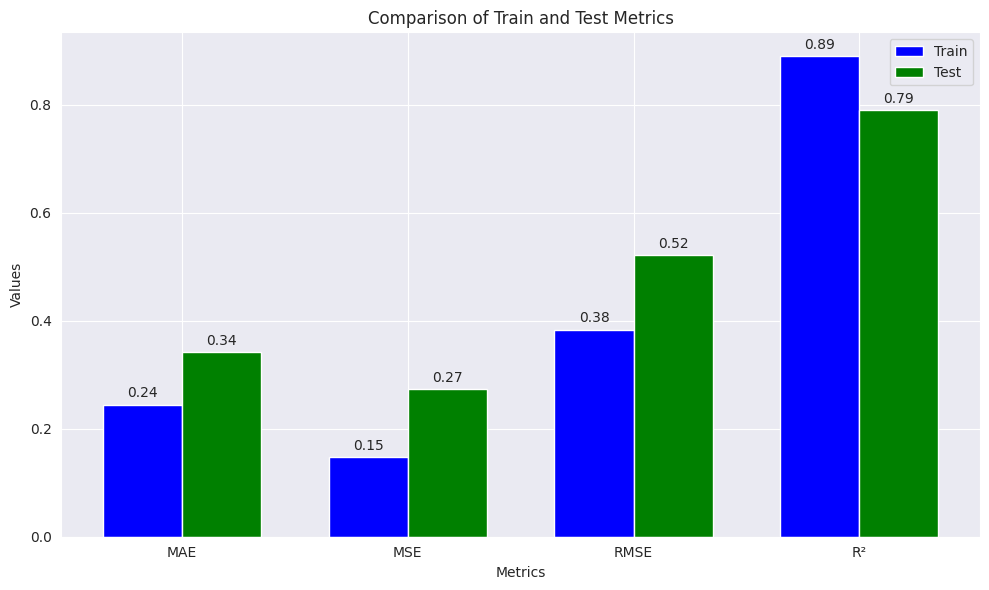

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, forest_model.predict(X_train))
train_mse = mean_squared_error(y_train, forest_model.predict(X_train))
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, forest_model.predict(X_train))

# Calculate metrics for test data
test_mae = mean_absolute_error(y_test, melb_preds)
test_mse = mean_squared_error(y_test, melb_preds)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, melb_preds)

# Create a bar plot to compare metrics
metrics = ['MAE', 'MSE', 'RMSE', 'R²']
train_values = [train_mae, train_mse, train_rmse, train_r2]
test_values = [test_mae, test_mse, test_rmse, test_r2]

x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, train_values, width, label='Train', color='blue')
rects2 = ax.bar(x + width/2, test_values, width, label='Test', color='green')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Train and Test Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Annotate the bars with the metric values
def annotate_bars(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

annotate_bars(rects1)
annotate_bars(rects2)

fig.tight_layout()
plt.show()

$$
\text{Neural Network}
$$

In [226]:
train_data = tf.data.Dataset.from_tensor_slices(
    (X_train.astype(np.float32), y_train.values.astype(np.float32))
)
test_data = tf.data.Dataset.from_tensor_slices(
    (X_test.astype(np.float32), y_test.values.astype(np.float32))
)

In [227]:
BATCH = 64
train_data = train_data.batch(BATCH).prefetch(tf.data.AUTOTUNE)
test_data = test_data.batch(BATCH).prefetch(tf.data.AUTOTUNE)


In [228]:
from tensorflow.keras.models import Sequential

nn_model = Sequential([
    tf.keras.layers.Input(shape=(8,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [229]:
nn_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = 'mse',
    metrics = ['mae', tf.keras.metrics.RootMeanSquaredError()]
)

In [230]:
history = nn_model.fit(
    train_data,
    epochs = 100,
    validation_data = test_data,
    verbose = 0,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=5,
        restore_best_weights=True)
    ]
)

In [231]:
test_loss, test_mae, test_rmse = nn_model.evaluate(test_data)
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Test MAE: {test_mae:.2f}")

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.3009 - mae: 0.3876 - root_mean_squared_error: 0.5484
Test RMSE: 0.55
Test MAE: 0.39


452/452 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


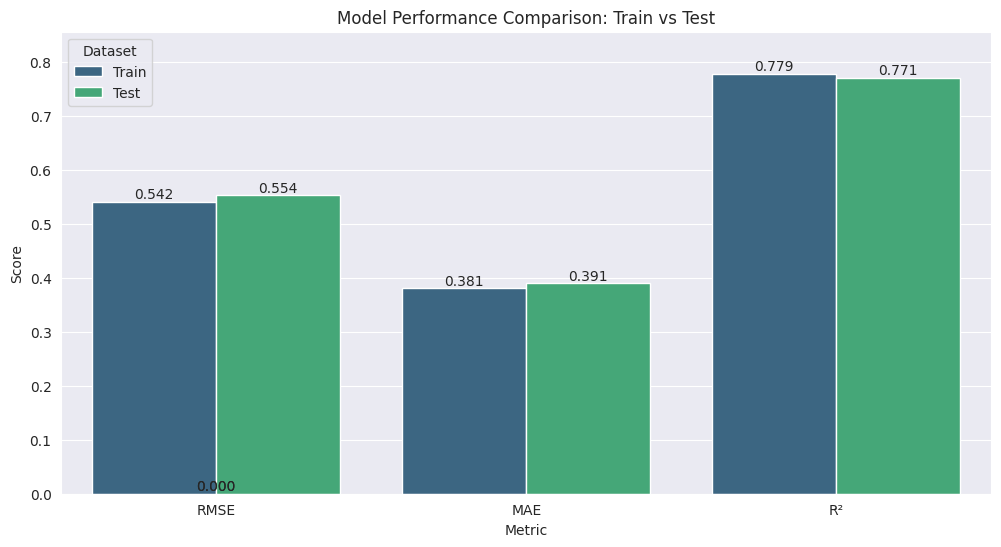

In [232]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Generate predictions for both sets
y_train_pred = nn_model.predict(X_train).flatten()
y_test_pred = nn_model.predict(X_test).flatten()

# Calculate metrics
metrics = {
    'RMSE': [
        np.sqrt(mean_squared_error(y_train, y_train_pred)),
        np.sqrt(mean_squared_error(y_test, y_test_pred))
    ],
    'MAE': [
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred)
    ],
    'R²': [
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)
    ]
}

# Create DataFrame for plotting
metrics_df = pd.DataFrame(metrics).T.reset_index()
metrics_df.columns = ['Metric', 'Train', 'Test']

# Melt to long format
plot_df = metrics_df.melt(id_vars='Metric', var_name='Dataset', value_name='Value')

plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='Value', hue='Dataset', data=plot_df, palette="viridis")
plt.title("Model Performance Comparison: Train vs Test")
plt.ylabel("Score")
plt.legend(title='Dataset')
plt.ylim(0, max(plot_df['Value']) * 1.1)

# Add value labels
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height():.3f}",
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 5),
                      textcoords='offset points')

plt.show()

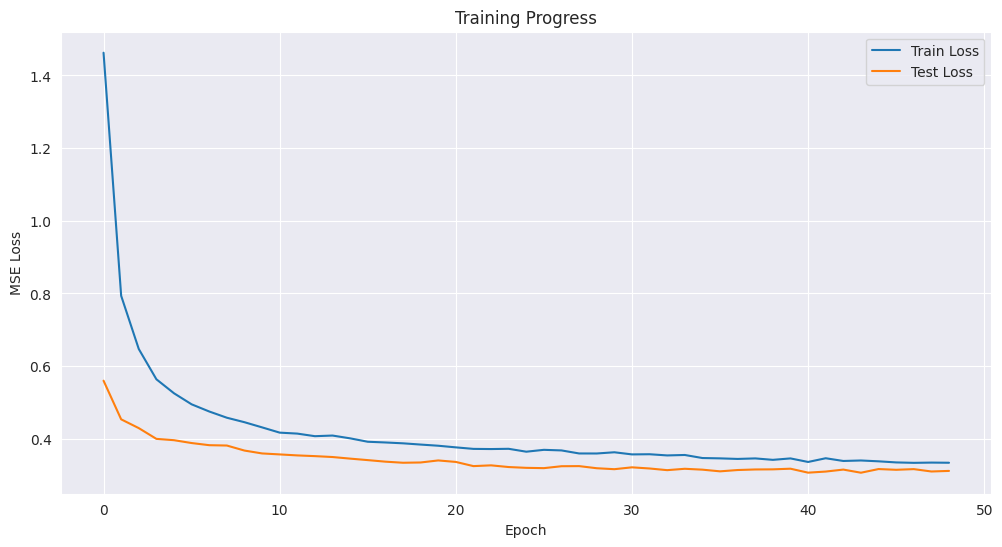

In [233]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Training Progress')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

In [234]:
sample_data = {
    'MedInc': [2.3886],
    'HouseAge': [16.0],
    'AveRooms': [5.254717],
    'AveBedrms': [1.162264],
    'Population': [1387.000000],
    'AveOccup': [2.616981],
    'Latitude': [39.370000],
    'Longitude': [-121.240000]
}

sample_df = pd.DataFrame(sample_data)

scaled_sample = scaler.transform(sample_df)

prediction = nn_model.predict(scaled_sample)

print(f"Predicted Median House Value: ${prediction[0][0]:.5f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Predicted Median House Value: $0.83138


In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([0, 10], [0, 10], '--k')
plt.axis('equal')
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('True vs Predicted Ratings')
plt.xlabel('True Rating')
plt.ylabel('Predicted Rating')
plt.show()

$$
\text{Test outputs vs true value (0.894000)}
$$
$$
\text{Linear Regression (0.51835)}
$$
$$
\text{Random Forest (0.98537)}
$$
$$
\text{Neural Network (0.96491)}
$$